# <font face="times"><font size="6pt"><p style = 'text-align: center;'><b>Data 765 | Introduction to Computational Social Science</b><br/><br/>
<font face="times"><font size="6pt"><p style = 'text-align: center;'><b> Lesson 06 Homework</b><br/><br/>
<font face="times"><font size="6pt"><p style = 'text-align: center;'><b> [10 Marks]</b><br/><br/>







## For the following questions, you'll need to find your own data. 

## Describe what the data are and what variables you'll be using. 

### DATA = LendingClub.com dataset
#### The dataset I am using comes from the LendingClub.com website. The file contaisn all accepted loans from 2007 to 4th quater 2018. The original file contains aroung 150 varialbes, however, for this exercise, I will be using only 10. The goal of this exercise is to predict the loan status given the inputs procided for my variables.
### VARIABLES

-loan_amnt - amount of money lended

-emp_length - Number of years

-home_ownership - Homeownership status (rent/own/mortgage)

-annual_inc - Annual income in dollars

-purpose - Purpose of the loan bein granted

-fico_range_low - Credit score

-fico_range_high - Credit score

-term - Duration of the loan

-loan_status - 

In [1]:
myVars=['loan_amnt','emp_length','home_ownership','annual_inc',
        'purpose','fico_range_low','fico_range_high'] 

***
***
# Import all of the modules you'll be using here:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

***
***


# Question 1 of 5  [2 Marks]

## Find a dataset and run your own `KNN`, using a value of K=10. 

## Be sure to create training and testing sets of data. 

### Since my dataset is too big (2M+ records), I decided to sample the data using the stratified sampling method. I will import every 100th record in the csv file. 

In [3]:
f='C:/Users/valej/Desktop/DATA-765/HWs/acceptedCreditsClean'
n=100

In [4]:
num_lines=sum(1 for l in open(f))
num_lines

2113758

In [5]:
skip_index=[x for x in range(1, num_lines) if x % n !=0]

In [6]:
df=pd.read_csv(f, skiprows=skip_index)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21137 entries, 0 to 21136
Data columns (total 9 columns):
Unnamed: 0         21137 non-null int64
loan_amnt          21137 non-null float64
emp_length         21137 non-null int64
home_ownership     21137 non-null int64
annual_inc         21137 non-null float64
purpose            21137 non-null int64
fico_range_low     21137 non-null float64
fico_range_high    21137 non-null float64
loan_status        21137 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 1.5+ MB


In [8]:
X=df[myVars]
y=df['loan_status']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

### Predicting - In order to predict the loan status, basically default or no default, I will use the following parameters in my model.

*Loan Amount = $30,000<br>

*Employment Lenght = 4 years (4)<br>

*Home Ownership = Rent (2)<br>

*Annual Income = $45,000 <br>

*Purpose = Debt Consolidation (1) <br>

*Fico Range Low = 725 <br>

*Fico Range High = 729 <br>

In [10]:
prediction=knn.predict([[30000,4,2,45000,1,725,729]])
prediction[0]

'Good'

***
***

# Question 2 of 5  [2 Marks]

## Run KNNs using the data you found in Question 1 and use GridSearch to find the optimal value of `K`. Which `K` worked best?

## Calculate the precision and accuracy for this `K`. How does it compare to a `K` of 10?

## Interpret these results. What do you see?

In [11]:
param_grid = {'n_neighbors': np.arange(1, 10)} 

In [12]:
my_model_grid_search = GridSearchCV(knn, # My Model 
                                    param_grid, # My Parameters
                                    cv=10) # Number of Crossfolds
my_model_grid_search

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [13]:
my_model_grid_search.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
pd.DataFrame(my_model_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023242,0.003516,0.047247,0.003422,1,{'n_neighbors': 1},0.763009,0.754494,0.780511,0.787133,0.780511,0.774361,0.789499,0.785714,0.768102,0.785511,0.776884,0.011047,8
1,0.021588,0.006058,0.050566,0.008338,2,{'n_neighbors': 2},0.675024,0.665563,0.708136,0.698675,0.702460,0.690634,0.701514,0.706244,0.687648,0.706439,0.694233,0.013691,9
2,0.023568,0.007040,0.045382,0.006016,3,{'n_neighbors': 3},0.831599,0.820246,0.837275,0.837275,0.837275,0.826395,0.843898,0.831126,0.831992,0.833807,0.833089,0.006221,6
3,0.022274,0.008382,0.045713,0.004417,4,{'n_neighbors': 4},0.802271,0.790445,0.811258,0.808420,0.809366,0.792810,0.822138,0.801325,0.800757,0.808712,0.804750,0.008811,7
4,0.024243,0.005020,0.048102,0.003223,5,{'n_neighbors': 5},0.850520,0.839640,0.856197,0.858562,0.855251,0.846736,0.856670,0.853359,0.848557,0.853693,0.851918,0.005406,4
5,0.021998,0.003066,0.047416,0.004326,6,{'n_neighbors': 6},0.836802,0.830180,0.843898,0.849574,0.841533,0.830180,0.846736,0.840114,0.834359,0.847538,0.840091,0.006680,5
6,0.024508,0.003771,0.047224,0.006078,7,{'n_neighbors': 7},0.861400,0.854778,0.862346,0.865658,0.860454,0.857616,0.861873,0.861400,0.858022,0.865530,0.860907,0.003230,2
7,0.021231,0.002381,0.050237,0.005036,8,{'n_neighbors': 8},0.856670,0.850047,0.855724,0.859981,0.851466,0.851939,0.860454,0.853832,0.852816,0.864110,0.855703,0.004340,3
8,0.022242,0.003126,0.048010,0.003656,9,{'n_neighbors': 9},0.866131,0.865658,0.863292,0.864238,0.861873,0.863292,0.866131,0.863765,0.862754,0.866477,0.864361,0.001544,1


## Concusion
### The mean_test_score is an increasing function of the K. As k increases the accuracy of the model increases. 

***
***

# Question 3 of 5  [2 Marks]

##  Using your data, run an SVM model. 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
clf = SVC().fit(X_train, y_train)
y_prediction = clf.predict(X_test)


C:\Users\valej\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


***
***

# Question 4 of 5  [2 Marks]

## For the SVM model you ran in Question 3, calculate the precision and accuracy. 

## How does this compare to the KNN models you just ran?

## How do you interpret these SVM results?


In [16]:
print("accuracy:", metrics.accuracy_score(y_test, y_prediction))
print("precision:", metrics.precision_score(y_test, y_prediction,average='weighted'))
print("recall:", metrics.recall_score(y_test, y_prediction,average='weighted'))
print("f1 score:", metrics.f1_score(y_test, y_prediction,average='weighted'))

accuracy: 0.8700094607379376
precision: 0.7913471566921041
recall: 0.8700094607379376
f1 score: 0.8116674417603661


### The mean test score for the knn while using K=10 is very close to the accuracy in the SVM model. They are both close to 0.86.

***
***

# Question 5 of 5  [2 Marks]

## Using your SVM and the function from the Lesson 06 lecture, plot the support vectors. 

## What do you see here?

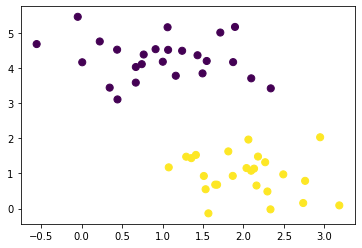

In [17]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

In [18]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
def plot_svc_decision_function(clf):
    """Plot the decision function for a 2D SVC"""
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    return plt.contour(X, Y, P, 
                       colors='k',
                       levels=[-1, 0, 1],
                       linestyles=['--', '-', '--'])

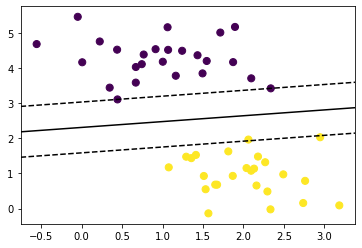

In [20]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=50)
plot_svc_decision_function(clf);